In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import os
import warnings
import joblib
warnings.filterwarnings('ignore')

In [3]:
books = pd.read_csv(r'C:\Users\nisar\Downloads\ADMProj\books.csv')

ratings = pd.read_csv(r'C:\Users\nisar\Downloads\ADMProj\ratings.csv')

   # Data Preprocessing

In [4]:
books.columns

Index(['id', 'book_id', 'best_book_id', 'work_id', 'books_count', 'isbn',
       'isbn13', 'authors', 'original_publication_year', 'original_title',
       'title', 'language_code', 'average_rating', 'ratings_count',
       'work_ratings_count', 'work_text_reviews_count', 'ratings_1',
       'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5', 'image_url',
       'small_image_url'],
      dtype='object')

In [5]:
columns = ['id', 'book_id', 'isbn', 'authors', 'original_publication_year', 'title', 'average_rating',
           'ratings_count', 'small_image_url']

books_new = books[columns]

books_new.head()

,id,book_id,isbn,authors,original_publication_year,title,average_rating,ratings_count,small_image_url
0,1,2767052,439023483,Suzanne Collins,2008.0,"The Hunger Games (The Hunger Games, #1)",4.34,4780653,https://images.gr-assets.com/books/1447303603s...
1,2,3,439554934,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Sorcerer's Stone (Harry P...,4.44,4602479,https://images.gr-assets.com/books/1474154022s...
2,3,41865,316015849,Stephenie Meyer,2005.0,"Twilight (Twilight, #1)",3.57,3866839,https://images.gr-assets.com/books/1361039443s...
3,4,2657,61120081,Harper Lee,1960.0,To Kill a Mockingbird,4.25,3198671,https://images.gr-assets.com/books/1361975680s...
4,5,4671,743273567,F. Scott Fitzgerald,1925.0,The Great Gatsby,3.89,2683664,https://images.gr-assets.com/books/1490528560s...


In [6]:
books_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         10000 non-null  int64  
 1   book_id                    10000 non-null  int64  
 2   isbn                       9300 non-null   object 
 3   authors                    10000 non-null  object 
 4   original_publication_year  9979 non-null   float64
 5   title                      10000 non-null  object 
 6   average_rating             10000 non-null  float64
 7   ratings_count              10000 non-null  int64  
 8   small_image_url            10000 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 703.2+ KB


In [7]:
books_new.isna().sum()

id                             0
book_id                        0
isbn                         700
authors                        0
original_publication_year     21
title                          0
average_rating                 0
ratings_count                  0
small_image_url                0
dtype: int64

In [8]:
books_new = books_new.fillna('NA')
books_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         10000 non-null  int64  
 1   book_id                    10000 non-null  int64  
 2   isbn                       10000 non-null  object 
 3   authors                    10000 non-null  object 
 4   original_publication_year  10000 non-null  object 
 5   title                      10000 non-null  object 
 6   average_rating             10000 non-null  float64
 7   ratings_count              10000 non-null  int64  
 8   small_image_url            10000 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 703.2+ KB


In [9]:
ratings.isna().sum()

book_id    0
user_id    0
rating     0
dtype: int64

In [10]:
books_new.to_csv('books_cleaned.csv')

# Data Modeling:

In [12]:
#Spliting the data
from sklearn.model_selection import train_test_split

train, test = train_test_split(ratings, test_size=0.2, random_state=42)

print(f"Shape of train data: {train.shape}")
print(f"Shape of test data: {test.shape}")

Shape of train data: (785404, 3)
Shape of test data: (196352, 3)


In [13]:
#nunique() will return the total number of unique items

book_id = ratings.book_id.nunique() 

user_id = ratings.user_id.nunique()
print('Total books: ' + str(book_id))
print('Total users: ' + str(user_id))

Total books: 10000
Total users: 53424


# Model Building:

In [14]:
from tensorflow.keras.layers import Dense, Flatten, Input, Embedding, Concatenate, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [16]:
#Embedding layer for books
books_input = Input(shape=[1])#1st Input Layer
embedding_layer_books = Embedding(book_id + 1,10)(books_input)#Embedding layer
embedding_output_books = Flatten()(embedding_layer_books)#Embedding layer output

#Embedding layer for users
users_input = Input(shape=[1])#1st Input Layer
embedding_layer_users = Embedding(user_id + 1,10)(users_input)#Embedding layer
embedding_output_users = Flatten()(embedding_layer_users)#Embedding layer output

In [17]:
#Concatenation and Dense layer

joining_layer = Concatenate()([embedding_output_books, embedding_output_users])
hidden_layer_1 = Dense(128, activation='relu')(joining_layer)
hidden_layer_1 = Dropout(0.5)(hidden_layer_1)

output_layer = hidden_layer_2 = Dense(1)(hidden_layer_1)

model = tf.keras.Model([books_input, users_input], output_layer)

In [20]:
#Model compilation

optimizer = Adam(lr=0.001, epsilon = 1e-6, amsgrad=True) #epsilon = decay rate
model.compile(optimizer = optimizer, loss = 'mean_squared_error')#Using mean squared error as loss function

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 embedding_2 (Embedding)        (None, 1, 10)        100010      ['input_3[0][0]']                
                                                                                                  
 embedding_3 (Embedding)        (None, 1, 10)        534250      ['input_4[0][0]']                
                                                                                              

# Training Model

In [21]:
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 1)

model.fit(
    [train.book_id, train.user_id], train.rating, 
    batch_size=64, 
    epochs=15, 
    verbose=1,
    callbacks = [early_stopping],
    validation_data=([test.book_id, test.user_id], test.rating))

Epoch 1/15
12272/12272 [==============================] - 189s 15ms/step - loss: 1.0466 - val_loss: 0.7300
Epoch 2/15
12272/12272 [==============================] - 184s 15ms/step - loss: 0.7995 - val_loss: 0.7137
Epoch 3/15
12272/12272 [==============================] - 181s 15ms/step - loss: 0.7459 - val_loss: 0.7080
Epoch 4/15
12272/12272 [==============================] - 177s 14ms/step - loss: 0.7121 - val_loss: 0.7073
Epoch 5/15
12272/12272 [==============================] - 175s 14ms/step - loss: 0.6876 - val_loss: 0.7051
Epoch 6/15
12272/12272 [==============================] - 169s 14ms/step - loss: 0.6655 - val_loss: 0.7046
Epoch 7/15
12272/12272 [==============================] - 177s 14ms/step - loss: 0.6474 - val_loss: 0.7058


<AxesSubplot:>

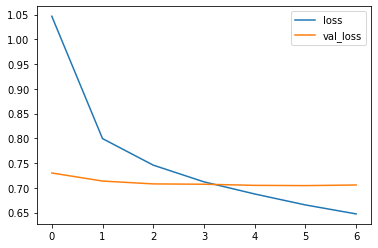

In [22]:
loss = pd.DataFrame(model.history.history)

loss[['loss', 'val_loss']].plot()

In [24]:
books.head(3)

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...


In [29]:
#Defining a function that will recommend top 5 books
def recommend(user_id):
    books = pd.read_csv(r'C:\Users\nisar\Downloads\ADMProj\books_cleaned.csv')
    ratings = pd.read_csv(r'C:\Users\nisar\Downloads\ADMProj\ratings.csv')
  
    book_id = list(ratings.book_id.unique()) #grabbing all the unique books
  
    book_arr = np.array(book_id) #geting all book IDs and storing them in the form of an array
    user_arr = np.array([user_id for i in range(len(book_id))])
    prediction = model.predict([book_arr, user_arr])
  
    prediction = prediction.reshape(-1) #reshape to single dimension
    prediction_ids = np.argsort(-prediction)[0:5]

    recommended_books = pd.DataFrame(books.iloc[prediction_ids], columns = ['book_id', 'isbn', 'authors', 'title', 'average_rating' ])
    print('Top 5 recommended books for you: \n')
    return recommended_books

In [30]:
ratings.user_id.unique().max()

53424

In [31]:
#Enter a number between 1 and 53424
recommend(789)

Top 5 recommended books for you: 



,book_id,isbn,authors,title,average_rating
3627,24812,740748475,Bill Watterson,The Complete Calvin and Hobbes,4.82
861,17332218,765326361,Brandon Sanderson,"Words of Radiance (The Stormlight Archive, #2)",4.77
9841,24019187,1250058902,Brandon Stanton,Humans of New York: Stories,4.50
7253,24816,836217691,Bill Watterson,Homicidal Psycho Jungle Cat: A Calvin and Hobb...,4.71
8945,46292,9646534783,Hafez,The Divan,4.63
